# Tasks
1. Function to measure cosine distance between face descriptors. It is useful to be able to take in a shape-(M, D) array of M descriptor vectors and a shape-(N, D) array of N descriptor vectors, and compute a shape-(M, N) array of cosine distances – this holds all MxN combinations of pairwise cosine distances.
2. Functionality to display an image with a box around detected faces with labels to indicate matches or an “Unknown” label otherwise

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
from facenet_models import FacenetModel
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

from PIL import Image
import cv2 as cv
import glob

## Task 1: Cosine Distance Function

In [3]:
def cos_distance (d1, d2):
    """
    Calculates the cosine distance between two descriptor vectors.

    Parameters
    ----------
    d1 : numpy.ndarray, shape-(M, D)
        The first descriptor vector, an array of M descriptor vectors.

    d2 : numpy.ndarray, shape-(N, D)
        The second descriptor vector, an array of N descriptor vectors.
    
    Returns
    -------
    numpy.ndarray, shape-(M, N)
        An array of cosine distances which holds all MxN combination so of pairwise cosine distances.
    """
    d1_mag = np.linalg.norm(d1, axis=1)
    d2_mag = np.linalg.norm(d2, axis=1)
    return 1 - ( np.matmul(d1, d2.T) / (d1_mag * d2_mag) )

In [4]:
a = np.array([[3, 4]])
b = np.array([[5, 12]])

cos_distance(a, b)

array([[0.03076923]])

## Task 2: Draw boxes around people's faces and label

In [5]:
def label_faces(image_data):
    """
    Displays an image with boxes around people's faces and labels them with names.

    Parameters
    ----------
    image_data : numpy.ndarray, shape-(R, C, 3) (RGB is the last dimension)
        Pixel information for the image.
    """
    
    # this will download the pretrained weights (if they haven't already been fetched)
    # which should take just a few seconds
    model = FacenetModel()

    # detect all faces in an image
    # returns a tuple of (boxes, probabilities, landmarks)
    boxes, probabilities, landmarks = model.detect(image_data)

    # producing a face descriptor for each face
    # returns a (N, 512) array, where N is the number of boxes
    # and each descriptor vector is 512-dimensional
    descriptors = model.compute_descriptors(image_data, boxes)
    
    print(f"Number of faces detected: {len(boxes)}")

    fig, ax = plt.subplots()
    ax.imshow(pic)

    for box, prob in zip(boxes, probabilities):
        # draw the box on the screen
        ax.add_patch(Rectangle(box[:2], *(box[2:] - box[:2]), fill=None, lw=2, color="red"))

(552, 428, 3)


<IPython.core.display.Javascript object>


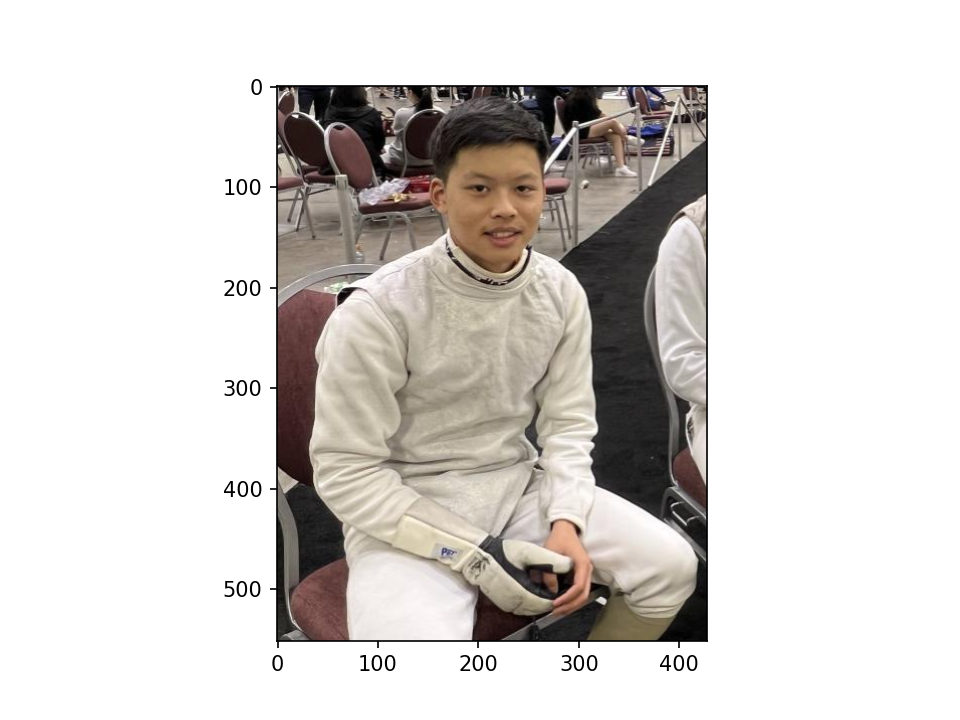

In [12]:
fpath = "./Images/"
img_path = fpath + "Evan1.png"
pic = np.array(Image.open(img_path))[:,:,:3]
print(pic.shape)
fig, ax = plt.subplots()
ax.imshow(pic)

Number of faces detected: 1


<IPython.core.display.Javascript object>


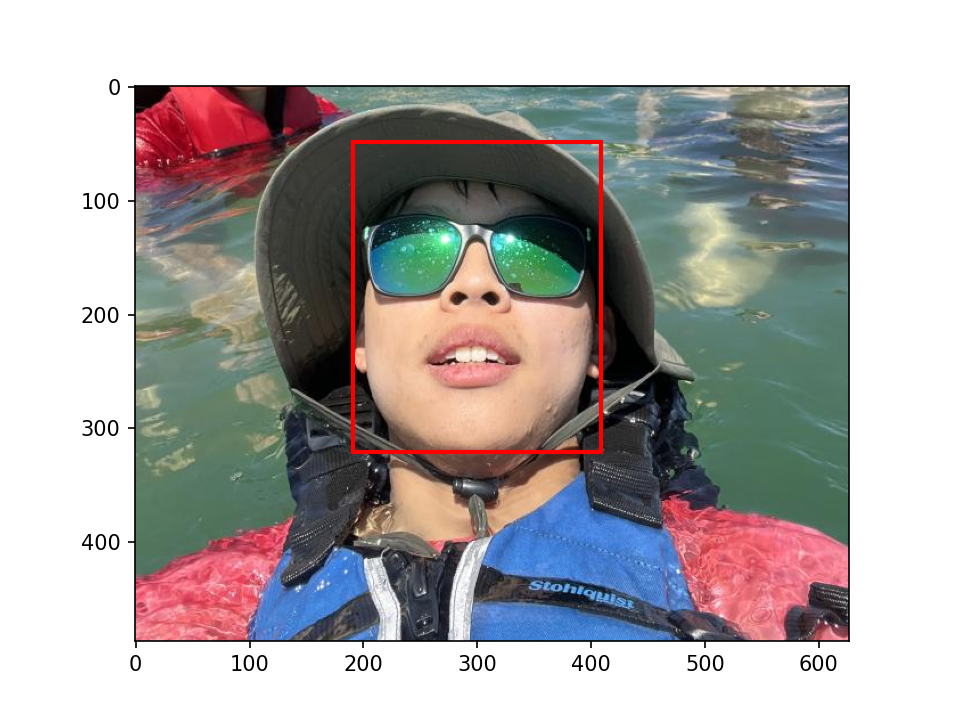

In [11]:
label_faces(pic)